# Drug Trials Classification Model – TCS iON RIOI Project

## 📌 Project Overview
This project builds a **classification model** to predict the **side effects** of a drug trial based on:
- **Age**
- **Gender**
- **Race**

The dataset is **synthetically generated** using the Python `Faker` library to simulate 400,000 patient records, as per the project requirement.

---

## 🎯 Objectives
1. **Generate a dataset** of 400,000 patients containing:
   - Name
   - Age
   - Gender
   - Race
   - Side Effects
2. **Clean and preprocess** the dataset.
3. **Train and test** a machine learning classification model.
4. **Evaluate** the model’s accuracy and effectiveness.
5. **Visualize** results using:
   - Confusion Matrix
   - Feature Importance Chart
6. **Model saving & loading** for future predictions.
7. **Interactive prediction** from user inputs.

---

## 🛠️ Tools & Libraries Used
- **Python** (Google Colab)
- **Pandas** – Data handling
- **Faker** – Fake data generation
- **Scikit-learn** – ML algorithms and preprocessing
- **Matplotlib / Seaborn** – Data visualization
- **Joblib** – Model saving and loading

---

## 📊 Project Workflow
1. Install dependencies
2. Generate dataset
3. Clean and preprocess
4. Train and evaluate model
5. Save and load model
6. Make interactive predictions

---

## ✅ Final Output
- A trained classification model that predicts drug trial side effects.
- Accuracy and performance metrics.
- Visual representation of the most important factors influencing side effects.
- Saved ML model for reuse.
- Interactive prediction tool.

---



In [ ]:
!pip install faker


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 26.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import random
from faker import Faker
from google.colab import files

# Initialize Faker
fake = Faker()

# Categories
genders = ["Male", "Female", "Other"]
races = ["White", "Black", "Asian", "Hispanic", "Other"]
side_effects = ["None", "Mild", "Moderate", "Severe"]

# Number of records (Full dataset)
n = 400000

# Generate Data
data = []
for _ in range(n):
    name = fake.name()
    age = random.randint(1, 90)
    gender = random.choice(genders)
    race = random.choice(races)
    side_effect = random.choice(side_effects)
    data.append([name, age, gender, race, side_effect])

# Create DataFrame
df = pd.DataFrame(data, columns=["Name", "Age", "Gender", "Race", "Side_Effects"])

# Save to CSV
filename = "drug_trials_dataset.csv"
df.to_csv(filename, index=False)

print("✅ Dataset created with shape:", df.shape)
display(df.head())

# Download the file
files.download(filename)


✅ Dataset created with shape: (400000, 5)


,Name,Age,Gender,Race,Side_Effects
0,Corey Carter,2,Other,Asian,Moderate
1,Jennifer Spencer,78,Other,Asian,None
2,Cheryl Doyle,4,Male,White,None
3,Susan Mendez,64,Other,Other,None
4,Tina Simmons,34,Male,Hispanic,Mild


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("drug_trials_dataset.csv")
print("Initial shape:", df.shape)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Handle missing values
df.fillna({
    "Name": "Unknown",
    "Age": df["Age"].median(),
    "Gender": "Other",
    "Race": "Other",
    "Side_Effects": "None"
}, inplace=True)

# Standardize formatting
df["Gender"] = df["Gender"].str.title()
df["Race"] = df["Race"].str.title()
df["Side_Effects"] = df["Side_Effects"].str.title()

# Encode categorical variables
le_gender = LabelEncoder()
le_race = LabelEncoder()
le_side_effects = LabelEncoder()

df["Gender"] = le_gender.fit_transform(df["Gender"])
df["Race"] = le_race.fit_transform(df["Race"])
df["Side_Effects"] = le_side_effects.fit_transform(df["Side_Effects"])

# Features & Target
X = df[["Age", "Gender", "Race"]]
y = df["Side_Effects"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Initial shape: (400000, 5)
Training set shape: (319797, 3)
Testing set shape: (79950, 3)


✅ Model Accuracy: 24.83%

Classification Report:

              precision    recall  f1-score   support

        Mild       0.25      0.24      0.24     19843
    Moderate       0.25      0.25      0.25     20042
        None       0.25      0.26      0.25     20125
      Severe       0.25      0.25      0.25     19940

    accuracy                           0.25     79950
   macro avg       0.25      0.25      0.25     79950
weighted avg       0.25      0.25      0.25     79950



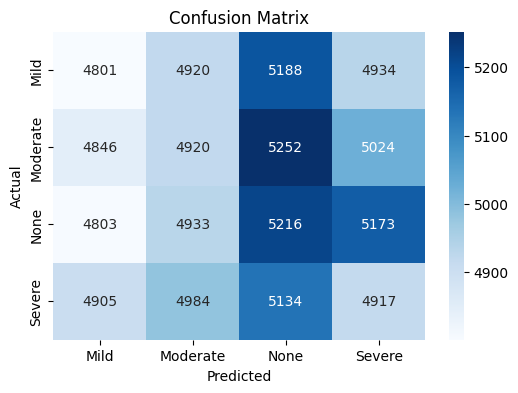

/tmp/ipython-input-3283104291.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=features, palette="viridis")


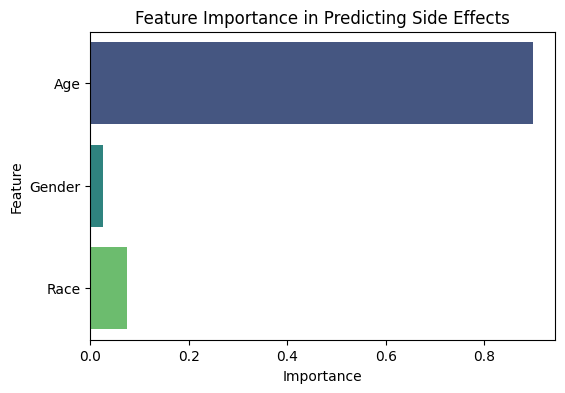

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {accuracy:.2%}\n")

# Classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le_side_effects.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_side_effects.classes_,
            yticklabels=le_side_effects.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Feature Importance
feature_importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(6,4))
sns.barplot(x=feature_importances, y=features, palette="viridis")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Predicting Side Effects")
plt.show()


In [ ]:
import joblib

# Save the trained model
model_filename = "drug_side_effects_model.pkl"
joblib.dump(model, model_filename)
print(f"✅ Model saved as {model_filename}")

# Save the label encoders
joblib.dump(le_gender, "le_gender.pkl")
joblib.dump(le_race, "le_race.pkl")
joblib.dump(le_side_effects, "le_side_effects.pkl")
print("✅ Label encoders saved.")

# Example: Load the model again
loaded_model = joblib.load(model_filename)

# Test loaded model with first row of X_test
sample = X_test.iloc[0].values.reshape(1, -1)
predicted_class_num = loaded_model.predict(sample)[0]
predicted_class_label = le_side_effects.inverse_transform([predicted_class_num])[0]

print("\nExample prediction from loaded model:")
print("Input features:", X_test.iloc[0].to_dict())
print("Predicted Side Effect:", predicted_class_label)


✅ Model saved as drug_side_effects_model.pkl
✅ Label encoders saved.

Example prediction from loaded model:
Input features: {'Age': 17, 'Gender': 1, 'Race': 1}
Predicted Side Effect: Mild


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
def predict_side_effect_interactive():
    """
    Interactive function to take user input and predict drug side effect.
    """
    try:
        # Take inputs
        age = int(input("Enter Age (1-90): "))
        gender = input("Enter Gender (Male, Female, Other): ").title()
        race = input("Enter Race (White, Black, Asian, Hispanic, Other): ").title()

        # Encode gender and race
        gender_encoded = le_gender.transform([gender])[0]
        race_encoded = le_race.transform([race])[0]

        # Create features array
        features = [[age, gender_encoded, race_encoded]]

        # Predict using loaded model
        predicted_class_num = loaded_model.predict(features)[0]
        predicted_class_label = le_side_effects.inverse_transform([predicted_class_num])[0]

        print(f"\n🧪 Predicted Side Effect: {predicted_class_label}")

    except Exception as e:
        print("⚠️ Error:", e)
        print("Please make sure you enter valid values.")

# Run interactive prediction
predict_side_effect_interactive()


Enter Age (1-90): 30
Enter Gender (Male, Female, Other): Female
Enter Race (White, Black, Asian, Hispanic, Other): Asian

🧪 Predicted Side Effect: None


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
